## Класс k-Means
#### Дано:
- дан класс K_Means кластеризации данных

#### Требуется:
- изменить способ задания начальных положений центров кластеров: разбросать случайным образом между(!) точек заданного обучающего множества dataset (определив разброс точек по всем координатам)
- изменить способ задания параметра tolerance: значение параметра должно равняться 1/10000 от минимального диапазона изменения признаков объектов (например, если один признак изменятся в диапазоне [100,200], а другой - [0.1,10], то tolerance = (10-0.1)/10000)
- дописать метод get_dist: пользователь должен иметь возможность использовать одну из 4 метрик при подсчете расстояний между объектами (евклидово расстояние, квадрат евклидова расстояния, расстояние городских кварталов, расстояние Чебышёва)
- написать метод get_labels: методом можно воспользоваться только после обучения модели (fitted == True), метод принимает двумерный массив объектов (могут быть точки не принадлежащие исходному обучающему множеству dataset), метод возвращает одномерный массив индексов соответствующих кластеров (по близости до центров кластеров)

In [2]:
#import points_generator.points_generator as pg

import pygame
import numpy as np


def generate(width: int, height: int):
    points = np.empty((0, 2), dtype='f')

    c_radius = 2
    c_color = (0, 0, 255)
    c_thickness = 0

    bg_color = (255, 255, 255)
    screen = pygame.display.set_mode((width, height))
    pygame.display.set_caption('Points Generator')

    running = True
    pushing = False

    while running:

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
            elif event.type == pygame.MOUSEBUTTONDOWN:
                pushing = True
            elif event.type == pygame.MOUSEBUTTONUP:
                pushing = False
        if pushing:
            (x, y) = pygame.mouse.get_pos()
            # coord = [x, y]
            r = np.random.uniform(0, 20)
            t = np.random.uniform(0, 2 * np.pi)
            coord = [x + r * np.cos(t), height - (y + r * np.sin(t))]  # Отражение относительно оси Х
            if coord not in points:  # Если значение уникально, то добавляем
                points = np.append(points, [coord], axis=0)

        screen.fill(bg_color)
        for point in points:
            # При отрисовке отражаем обратно
            pygame.draw.circle(screen, c_color, (int(point[0]), height - int(point[1])), c_radius, c_thickness)
        pygame.display.flip()

    pygame.quit()
    return points

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [1]:
import numpy as np

class KMeans():
    
    def __init__(self, dataset, n_clusters=3, distance_type=None):
        self.dataset = np.array(dataset)
        self.n_clusters = n_clusters
        self.centroids = np.array([[np.random.uniform(a, b) for a, b in zip(np.min(self.dataset, axis=0), \
                                                                            np.max(self.dataset, axis=0))] \
                                                                            for k in range(self.n_clusters)], dtype='f')
        self.labels = np.array([], dtype='i')
        self.fitted = False
        self.max_n_iter = 100
        self.tolerance = self.get_tolerance()
        self.distance = distance_type
        
        
    def get_dist(self, list1, list2, type=None):
        if type == None or type == "euclid": # Euclidean distance
            return np.linalg.norm(np.array(list1) - np.array(list2), ord=None)
        elif type == "euclid2":
            return np.linalg.norm(np.array(list1) - np.array(list2), ord=None)**2
        elif type == "quartal":
            return np.linalg.norm(np.array(list1) - np.array(list2), ord=1)
        elif type == "chebyshev":
            return np.linalg.norm(np.array(list1) - np.array(list2), ord=np.inf)
        elif isinstance(type, int) and type >= 0:
            return np.linalg.norm(np.array(list1) - np.array(list2), ord=int(type))
        else:
            raise Exception("Wrong distance type")
    
    def get_tolerance(self):
        return np.min(np.max(self.dataset, axis=0) - np.min(self.dataset, axis=0))/10000
        
        
    
    def distribute_data(self):
        self.labels = np.array([], dtype='i')
        for data in self.dataset:
            #print(np.array([self.get_dist(data,center) for center in self.centroids]).argmin())
            self.labels = np.append(self.labels,\
                                   np.array([self.get_dist(data,center, self.distance) \
                                             for center in self.centroids]).argmin())
            
    def recalculate_centroids(self):
        for i in range(self.n_clusters):
            num = 0
            temp = np.zeros(self.dataset[0].shape)
            for k,label in enumerate(self.labels):
                if label == i:
                    temp += self.dataset[k]
                    num += 1
            self.centroids[i] = temp/num
            
    def fit(self):
        iter = 0
        while iter < self.max_n_iter:
            prev_centroids = self.centroids.copy()
            self.distribute_data()
            self.recalculate_centroids()
            if np.array([self.get_dist(i,j,self.distance) for i,j in zip(prev_centroids,self.centroids)]).max()\
            < self.tolerance:
                print(iter)
                break
            iter += 1
        self.fitted = True
        
    def predict(self, list2d):
        if not self.fitted:
            self.fit()
        labels = np.array([], dtype='i')
        for data in list2d:
            #print(np.array([self.get_dist(data,center) for center in self.centroids]).argmin())
            labels = np.append(labels,np.array([self.get_dist(data,center, self.distance) \
                                             for center in self.centroids]).argmin())
        return labels
        
        

In [56]:
pts = pg.generate(640, 480)

In [60]:
model = KMeans(pts, n_clusters=3, distance_type="chebyshev")
print(model.labels)
print(model.centroids)

print(model.get_dist([0,0,0,1],[1,1,1,0]))

model.distribute_data()
print(model.labels)

model.recalculate_centroids()
print(model.centroids)
model.fit()

[]
[[295.4926  290.9993 ]
 [509.17838 288.28262]
 [129.94707 216.81093]]
2.0
[2 2 2 ... 0 0 0]
[[232.05775 264.379  ]
 [491.8217  272.35596]
 [128.40662 278.62448]]
3


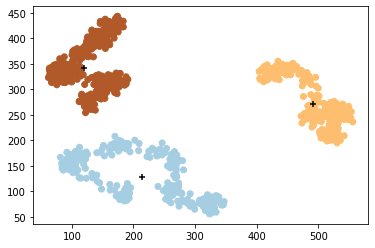

In [61]:
import matplotlib.pyplot as plt
plt.scatter(pts[:,0],pts[:,1],c=model.labels,cmap=plt.cm.Paired)
plt.scatter(model.centroids[:,0],model.centroids[:,1],c='black',marker='+')
plt.show()

[394.33354739 385.99516652 377.68346179 ... 327.92542392 342.38794575
 341.59931352]
[2 2 2 ... 1 1 1]


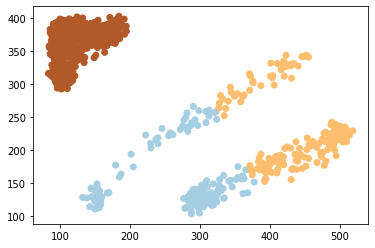

In [62]:
test_data = pg.generate(640, 480)
print(test_data[:,1])
print(model.predict(test_data))
plt.scatter(test_data[:,0],test_data[:,1],c=model.predict(test_data),cmap=plt.cm.Paired)
plt.show()

In [4]:
np.max([np.abs(i - j) for i, j in zip([1, 2, 3], [-2, 0.3, 7])])

4.0